In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import re
import datetime as dt
import yfinance as yf
import time

In [2]:
global df_bitcoin, actual_price, tendency, media_bitcoin, decision_algorithm


In [5]:
def import_base_bitcoin():
  period = '7d'
  interval = '5m'
  url = 'https://finance.yahoo.com/crypto'
  ua = {'User-Agente': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}
  r = requests.get(url, headers= ua)

  bitcoin = yf.Ticker("BTC-USD")
  historic = bitcoin.history(period=period, interval=interval)

  return historic
df_bitcoin = import_base_bitcoin()
df_bitcoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-23 00:00:00+00:00,30002.443359,30002.443359,29939.513672,29950.691406,0,0.0,0.0
2023-10-23 00:05:00+00:00,29968.242188,29976.166016,29949.933594,29949.933594,19917824,0.0,0.0
2023-10-23 00:10:00+00:00,29957.041016,29987.125000,29957.041016,29965.908203,19190784,0.0,0.0
2023-10-23 00:15:00+00:00,29979.537109,29979.537109,29965.908203,29965.908203,0,0.0,0.0
2023-10-23 00:20:00+00:00,29975.019531,29975.019531,29928.232422,29928.232422,5450752,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-29 00:45:00+00:00,34095.640625,34100.460938,34095.578125,34100.460938,5491712,0.0,0.0
2023-10-29 00:50:00+00:00,34099.140625,34104.210938,34083.117188,34083.117188,3545088,0.0,0.0
2023-10-29 00:55:00+00:00,34102.523438,34102.523438,34085.156250,34085.156250,13798400,0.0,0.0


In [11]:
def get_tendencys():
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}
  url = 'https://coinmarketcap.com/'
  data_response = requests.get(url, headers=headers)

  s=BeautifulSoup(data_response.content, features='lxml')

  prices = s.findAll('div',{'class':['sc-a0353bbc-0 gDrtaY rise','sc-a0353bbc-0 gDrtaY','sc-a0353bbc-0 gDrtaY fall']})
  price=[]

  for item in prices:
    price.append(item.text.split())

  actual_price = float((price[0][0]).replace("$", "").replace(",", ""))
  tendencys = s.findAll('span', {'class':['sc-d55c02b-0 gUnzUB','sc-d55c02b-0 iwhBxy']})
  tendency_bitcoin =  tendencys[0]
  icon = tendency_bitcoin.find('span', {'class': ['icon-Caret-down', 'icon-Caret-up']})

  tendency = 'a la baja' if 'icon-Caret-down' in icon['class'] else 'es al alza'

  print(f'El precio actual del bitcoin es: ${actual_price} dólares')
  print(f'La tendencia actual es: {tendency} ')

  return actual_price, tendency

actual_price, tendency = get_tendencys()

df_bitcoin_copy = df_bitcoin.copy()
df_bitcoin_copy

El precio actual del bitcoin es: $34011.92 dólares
La tendencia actual es: es al alza 


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-23 00:00:00+00:00,30002.443359,30002.443359,29939.513672,29950.691406,0,0.0,0.0
2023-10-23 00:05:00+00:00,29968.242188,29976.166016,29949.933594,29949.933594,19917824,0.0,0.0
2023-10-23 00:10:00+00:00,29957.041016,29987.125000,29957.041016,29965.908203,19190784,0.0,0.0
2023-10-23 00:15:00+00:00,29979.537109,29979.537109,29965.908203,29965.908203,0,0.0,0.0
2023-10-23 00:20:00+00:00,29975.019531,29975.019531,29928.232422,29928.232422,5450752,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-29 00:45:00+00:00,34095.640625,34100.460938,34095.578125,34100.460938,5491712,0.0,0.0
2023-10-29 00:50:00+00:00,34099.140625,34104.210938,34083.117188,34083.117188,3545088,0.0,0.0
2023-10-29 00:55:00+00:00,34102.523438,34102.523438,34085.156250,34085.156250,13798400,0.0,0.0


In [12]:
def clean_data():
  duplicates = df_bitcoin_copy.index.duplicated()
  num_duplicates = duplicates.sum()

  df_limpio = df_bitcoin_copy if num_duplicates == 0 else df_bitcoin_copy.index.drop_duplicates(inplace=True)
  values_nan = df_limpio['Close'].isna()

  df_clean_bitcoin = df_limpio if values_nan is False else df_limpio.fillna(df_limpio['Close'].mean())

  df_bitcoin_clean = df_clean_bitcoin[df_clean_bitcoin['Volume'] > 0]

  Q1 = df_bitcoin_clean['Close'].quantile(0.25)
  Q3 = df_bitcoin_clean['Close'].quantile(0.75)
  IQR = Q3 - Q1

  df_bitcoin_filter =  df_bitcoin_clean[(df_bitcoin_clean['Close']>= Q1 ) & (df_bitcoin_clean ['Close']<= Q3)]

  media_bitcoin = df_bitcoin_filter['Close'].mean().round(3)

  print(f'El price promedio del bitcoin es: ${media_bitcoin} dólares')
  return df_bitcoin_filter, media_bitcoin, df_bitcoin_clean

df_bitcoin_filter, media_bitcoin, df_bitcoin_clean = clean_data()

El price promedio del bitcoin es: $33520.186 dólares


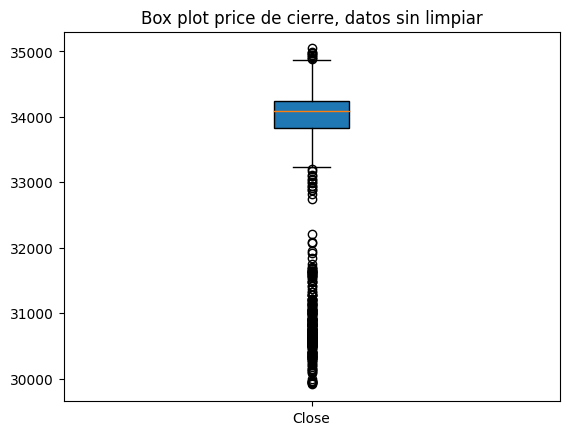

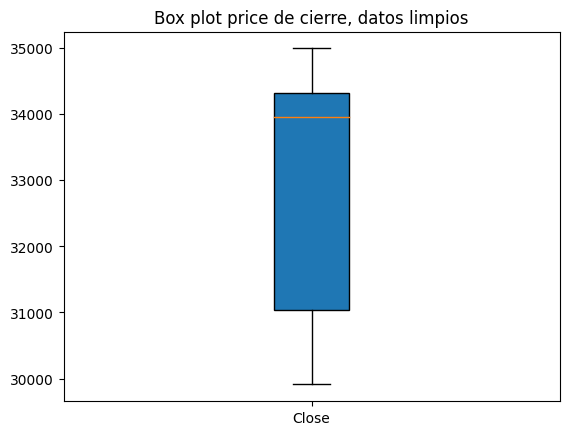

In [13]:
plt.boxplot(df_bitcoin_copy['Close'], patch_artist=True, labels=['Close'])
plt.title("Box plot price de cierre, datos sin limpiar")
plt.show()

plt.boxplot(df_bitcoin_clean['Close'], patch_artist=True, labels=['Close'])
plt.title("Box plot price de cierre, datos limpios")
plt.show()

In [17]:
def make_decisions():
  if actual_price >= media_bitcoin and tendency == 'a la baja':
    decision = 'Vender'
  elif actual_price <= media_bitcoin and tendency == 'es al alza':
    decision = 'Comprar'
  else:
    decision = 'Espera'

  print(decision)
  return decision

decision_algorithm = make_decisions()

Espera


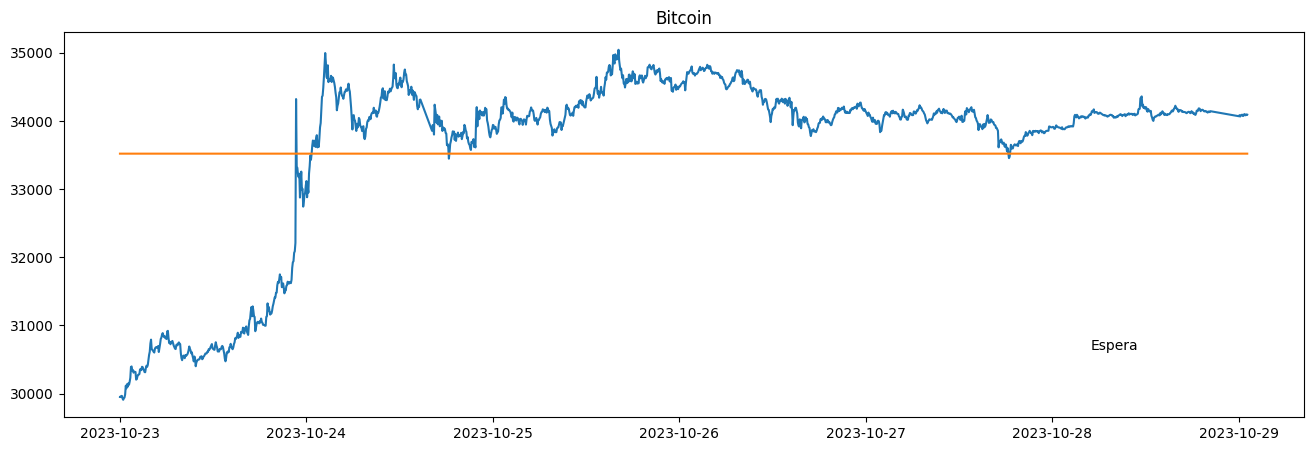

In [18]:
def visualizacion():
  df_bitcoin['Promedio'] = media_bitcoin
  plt.rc('figure',figsize = (16,5))
  plt.title('Bitcoin')
  y = df_bitcoin['Close']
  x = df_bitcoin.index
  z = df_bitcoin['Promedio']
  graph = plt.plot(x, y)
  graph_updated = plt.plot(x,z)
  x_text = x[-200] # índice indicado para x
  y_text = y[50]   # índice indicado para y
  plt.annotate(decision_algorithm, xy=(x_text, y_text))
  plt.show()
visualizacion()

El precio actual del bitcoin es: $34023.01 dólares
La tendencia actual es: es al alza 
El price promedio del bitcoin es: $33520.186 dólares
Espera


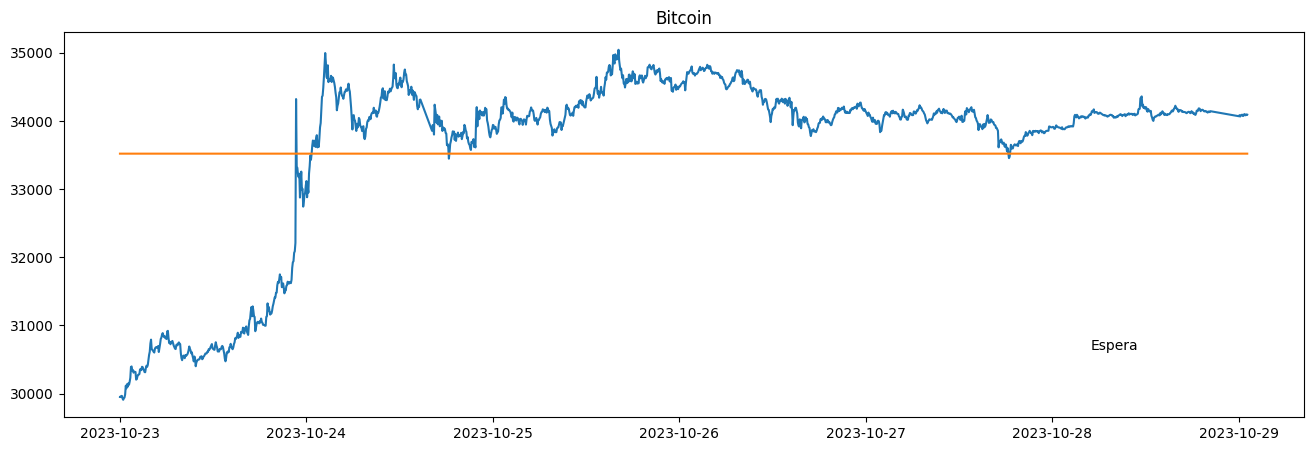

In [ ]:
while(True):
  import_base_bitcoin()
  get_tendencys()
  clean_data()
  make_decisions()
  visualizacion()
  time.sleep(300)